<a href="https://colab.research.google.com/github/RemyLpr/TP_PAUWELS/blob/main/TP2_Remy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Université Paul Sabatier, M2 SID
# Machine learning - TP2

En tête pour charger les fonctions nécessaires au TP. La fonction <code>generateData</code> vous permet de générer autant d'échantillon que vous voulez du processus suivant:
- $X$ est uniforme sur $[-1,1]$
- $Y = \sin(5X) + \epsilon$ où $\epsilon$ est une gaussienne de moyenne $0$ et de variance $1/10$.

On commence avec un échantillon d'entrainement fixé $S = (x_i,y_i)_{i=1}^{50}$.

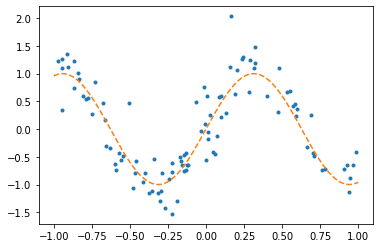

In [ ]:
%matplotlib inline
from matplotlib import pyplot
import math
import numpy as np
import scipy.misc
import numpy.random as npr
import sklearn as sk
from sklearn import neighbors
from sklearn import model_selection

def generateData(n,seed=2):
    npr.seed(seed)
    x = npr.rand(n)*2 - 1
    y = np.sin(x*5) + npr.normal(size=n) / np.sqrt(10)
    return(np.array(x).reshape(-1,1),np.array(y).reshape(-1,1))

(xn,yn) = generateData(100)
xSeq = np.array(np.linspace(-1,1,1000)).reshape(-1,1)
pyplot.plot(xn,yn,'.')
pyplot.plot(xSeq,np.sin(xSeq * 5),'--')

## Question 2: implémenter l'estimateur $k$-NN.

Question du TP1: L'échantillon d'entrainement est fixé. Dessiner l'estimateur de régression $k$-NN pour $k = 1,10,20,30,40$. Regarder la documentation de <code>scikit-learn</code>.

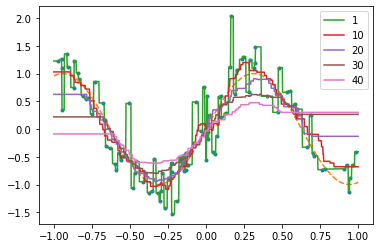

In [ ]:
pyplot.plot(xn,yn,'.')
pyplot.plot(xSeq,np.sin(xSeq * 5),'--')
for k in (1,10,20,30,40):
    knn = sk.neighbors.KNeighborsRegressor(k)
    knn.fit(xn, yn)
    yPred = knn.predict(xSeq)
    pyplot.plot(xSeq, yPred, label = k)

pyplot.legend()

Représenter l'erreur d'entrainement en fonction de $k = 1,2,\ldots,40$. Commenter. Pour rappel, l'erreur d'entrainement est donnée par
$$\frac{1}{n} \sum_{i=1}^n (\hat{f}_n(x_i) - y_i)^2$$
où $\hat{f}_n$ est entrainé sur $S = (x_i,y_i)_{i=1}^n$.

In [ ]:
def erreur(p, v):
  result = 0
  for i in range (len(p)):
    result += (p[i] - v[i])**2
  return result / len(p)

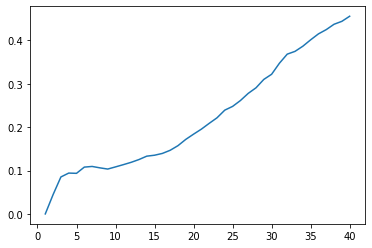

In [ ]:
error_list = []
k_list = []
for k in range (1, 40+1):
  k_list.append(k)
  knn = sk.neighbors.KNeighborsRegressor(k)
  knn.fit(xn, yn)
  yPred = knn.predict(xn)
  error_list.append(erreur(yPred, yn))

pyplot.plot(k_list, error_list)



Dans un premier temps, le cas où l'on n'utilise qu'un seul voisin : c'est toujours juste (erreur de 0). L'augmentation du nombre de voisins entraîne une prédiction tendant vers la valeur moyenne de l'échantillon.

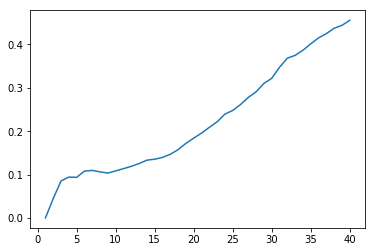

## Question 2: influence de la taille de l'échantillon test.

L'échantillon d'entrainement est fixé. Pour chaque valeur de $k$, vous avez une fonction de décision $f_k$ donnée par l'estimateur $k$-NN. Pour chaque $k$, le risque est donné par
$$R_k = \mathbb{E}_{X,Y}\left[(Y-f_k(X))^2 \right]$$
Vous cherchez à estimer le risque en remplaçant l'espérance par un échantillon de taille $n_{test}$.
$$\hat{R}_{k} =  \frac{1}{n_{test}} \sum_{i=1}^{n_{test}} (\tilde{y}_i-f_k(\tilde{x}_i))^2 .$$
Pour $n_{test} = 10,30,100,300,1000,3000,10000$, représenter $\hat{R}_{k}$ en fonction de $k = 1,2,\ldots, 2
0$. Commenter. Essayer avec une autre valeur de la graine pour l'échantillon de test. Dans l'idéal, comment devrait t'on choisir $n_{test}$?


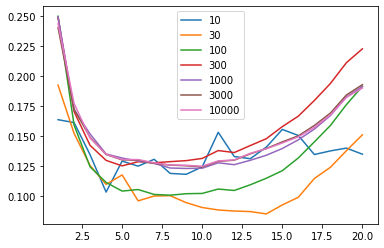

In [ ]:

for l_n in (10, 30, 100, 300, 1000, 3000, 10000):
  (xn_t,yn_t) = generateData(l_n, 1)
  error_list = []
  k_list = []
  for k in range (1, 20+1):
    knn = sk.neighbors.KNeighborsRegressor(k)
    knn.fit(xn, yn)
    k_list.append(k)
    yPred = knn.predict(xn_t)
    error_list.append(erreur(yPred, yn_t))
  pyplot.plot(k_list, error_list, label = l_n)
pyplot.legend()

**L'erreur se stabilise lorsque la taille de l'échantillon de test augmente. En effet, à partir d'un certain seuil, l'ajout de points dans l'échantillon d'entraînement n'améliore pas l'erreur, au contraire (loi des grands nombres). D'autre part, les résultats sont plus instables pour un échantillon petit (lorsque la graine change, la valeur de l'erreur varie fortement pour des petits échantillons).**

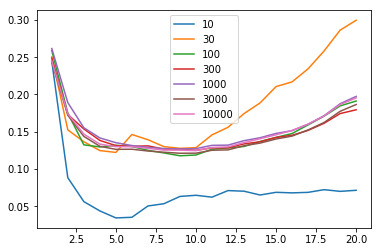

## Question 3: simuler l'aléa lié à l'échantillon d'entrainement avec le bootstrap
La commande <code>npr.normal(0,1,100)</code> vous permet de simuler un échantillon gaussien standard $\{x_i\}_{i=1}^{100}$ iid. La moyenne empirique 
$$\bar{x}_n = \frac{1}{n} \sum_{i=1}^n x_i$$
est une variable aléatoire gaussienne de moyenne nulle et de variance $1/n$. Pour n = 10,100,1000, estimer cette variance par la méthode du bootstrap sur un échantillon fixé et comparer à la réalité.

Pour $n = 100$, tracer l'histograme de votre échantillon et l'histogramme des moyennes bootstrapées. Commenter.

In [ ]:
from sklearn.utils import resample # for Bootstrap sampling
nb_ech = 1000

for n in (10, 100, 1000):
  x_true = npr.normal(0,1,n)
  moyenne = 0
  moyenne_carre = 0
  for i in range(nb_ech):
    x_resample = resample(x_true, n_samples = n)
    moyenne += np.mean(x_resample)
    moyenne_carre += (np.mean(x_resample))**2
  moyenne = moyenne / nb_ech
  moyenne_carre = moyenne_carre / nb_ech
  print((n, moyenne_carre - (moyenne)**2), "reality : ", 1/n)

(10, 0.09738555682849573) reality :  0.1
(100, 0.010795374187197103) reality :  0.01
(1000, 0.0011004526761947619) reality :  0.001


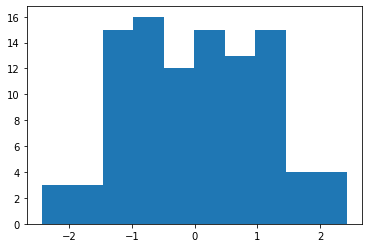

(array([  22.,  150.,  731., 1846., 2854., 2575., 1337.,  406.,   64.,
          15.]),
 array([-0.34606701, -0.26778072, -0.18949442, -0.11120813, -0.03292184,
         0.04536445,  0.12365075,  0.20193704,  0.28022333,  0.35850962,
         0.43679592]),
 <a list of 10 Patch objects>)

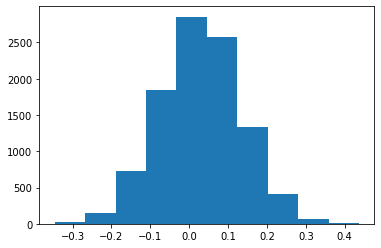

In [ ]:
n = 100
nb_ech = 10000
x_true = npr.normal(0,1,n)
moyenne = []
pyplot.hist(x_true)
pyplot.show()
for i in range(nb_ech):
    x_resample = resample(x_true, n_samples = n)
    moyenne.append(np.mean(x_resample))
pyplot.hist(moyenne)

**L'histogramme de l'échantillon ressemble bien à une loi gaussienne.
De plus, l'histogramme de la moyenne empirique de l'échantillon bootstrapé ressemble également à une loi gaussienne (bien plus que l'échantillon de départ)**

(10, 0.061686820423026784)
(100, 0.009907339845210885)
(1000, 0.0010390802343195472)


(array([  19.,  106.,  488., 1389., 2462., 2698., 1853.,  758.,  211.,
          16.]),
 array([-0.30238467, -0.23875393, -0.17512319, -0.11149244, -0.0478617 ,
         0.01576905,  0.07939979,  0.14303053,  0.20666128,  0.27029202,
         0.33392276]),
 <a list of 10 Patch objects>)

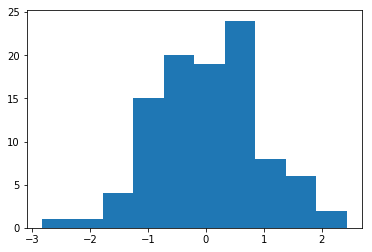

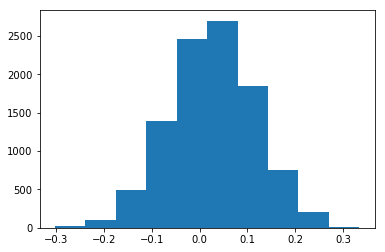

## Question 4: décomposition biais variance.

Question du TP1: 

Vous savez que $\mathbb{E}[Y|X=x] = \sin(5x)$ et que l'erreur de Bayes est de $1/10$ (pourquoi?).  
La taille de l'échantillon d'entrainement est fixée à 50, vous pouvez générer autant d'échantillon que vous voulez. Estimer et dessiner la décomposition biais variance de l'erreur de prediction de l'estimateur $k$-NN en $x = 0.5$ en fonction de $k$ variant entre 1 et 20. 
Pour rappel, pour un estimateur $\hat{f}_n$ dépendant d'un échantillon $\left\{(X_i, Y_i)\right\}_{i=1}^n$, le biais et la variance sont donnés respectivement par:
$$\mathbb{E}_n\left[f^*(0.5) - \hat{f}_n(0.5) \right]^2 \qquad\qquad \text{Var}_n\left[ \hat{f}_n(0.5)\right]  $$
où $f^*$ désigne la règle de Bayes et $\mathbb{E}_n$ et $\text{Var}_n$ désignent l'espérance et la variance pour le tirage de l'échantillon.
Quelle est la valeur de $k$ assurant le risque le plus faible? 

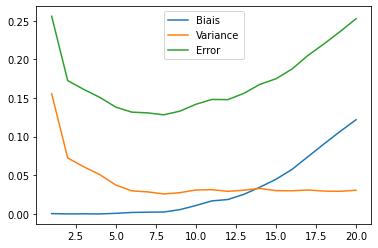

In [ ]:
kmax = 20
biais = np.zeros(kmax)
variances = np.zeros(kmax)
nTrain = 100

for k in range(kmax):
    predZero = np.zeros(nTrain)
    for i in range(nTrain):
        (xn,yn) = generateData(50,i)
        knn = sk.neighbors.KNeighborsRegressor(k+1)
        knn.fit(xn, yn)
        predZero[i] = knn.predict([[0.5]])
    biais[k] = np.mean(predZero- np.sin(5*0.5))**2
    variances[k] = np.mean((predZero - np.mean(predZero))**2)


pyplot.plot(np.linspace(1,kmax,kmax),biais, label = 'Biais')
pyplot.plot(np.linspace(1,kmax,kmax),variances, label = 'Variance')
pyplot.plot(np.linspace(1,kmax,kmax),biais + variances + 1./10, label = 'Error')
pyplot.legend()


Estimer la variance et le biais par la méthode du bootstrap pour un échantillon d'entrainement fixé, comparer.

100%|██████████| 20/20 [00:01<00:00, 14.64it/s]


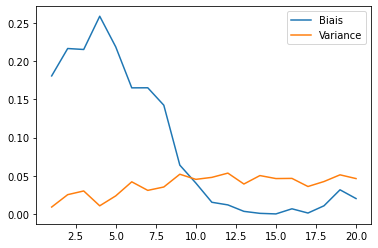

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from tqdm import tqdm

kmax = 20
biais = np.zeros(kmax)
variances = np.zeros(kmax)
nTrain = 50
(x_fix,y_fix) = generateData(nTrain,i)
x_fix = np.array(x_fix)
y_fix = np.array(y_fix)


df_data = pd.DataFrame(x_fix, columns = ["x"])
df_data["y"] = y_fix

n_size = 70

for k in tqdm(range(kmax)):
    predZero = np.zeros(nTrain)
    for i in range(nTrain):
      knn = sk.neighbors.KNeighborsRegressor(k+1)
      df_data_resample = resample(df_data, replace=True, n_samples=n_size)
      xn = np.array([df_data_resample["x"].tolist()])
      yn = np.array([df_data_resample["y"].tolist()])
      xn = (xn.reshape((xn.shape[1], 1)))
      yn = (yn.reshape((yn.shape[1], 1)))
      knn.fit(xn, yn)
      predZero[i] = knn.predict([[0.5]])
    biais[k] = np.mean(predZero- np.sin(5*0.5))**2
    variances[k] = np.mean((predZero - np.mean(predZero))**2)


pyplot.plot(np.linspace(1,kmax,kmax),biais, label = 'Biais')
pyplot.plot(np.linspace(1,kmax,kmax),variances, label = 'Variance')
pyplot.legend()


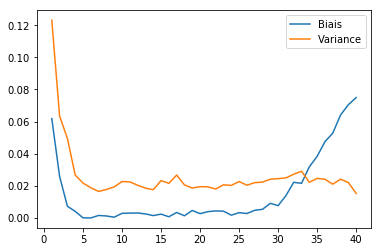

## Question 5: validation croisée.
La validation croisée permet d'estimer des valeurs de risques en mélangeant l'idée d'échantillon de test et le ré-échantillonage. Cela permet de prendre en compte l'incertain lié au fait que l'on cherche à prédire sur de nouvelles données que l'on ne connais pas (erreur de prédiction), et le fait que notre échantillon d'entrainement est tiré aléatoirement (erreur d'estimation).

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection

https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html


Choisissez $k$ par validation croisée $K$-fold pour $K= 2,5,10,20$, échantillon d'entrainement fixé, comparer avec les questions précédentes. 

In [ ]:
nTrain = 50
(x_fix,y_fix) = generateData(nTrain,i)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_fix, y_fix, test_size=0.5, random_state=0)

{'n_neighbors': 3}
[-0.20828334 -0.16100551 -0.1470108  -0.14910127 -0.14890322 -0.15991718
 -0.18492711 -0.18866972 -0.19948477 -0.21516432 -0.25419174 -0.2772575
 -0.30603866 -0.33586238 -0.3608711  -0.38123009 -0.40795333 -0.43200046
 -0.45483547 -0.47361192]
{'n_neighbors': 7}
[-0.20963428 -0.20468664 -0.17536618 -0.15968679 -0.1564885  -0.14726877
 -0.14271285 -0.14330835 -0.15952615 -0.16375974 -0.17144798 -0.18684254
 -0.19410539 -0.20162984 -0.22274982 -0.23987925 -0.25725734 -0.27638612
 -0.2895307  -0.30169355]
{'n_neighbors': 8}
[-0.19011721 -0.19280972 -0.16447569 -0.15156342 -0.15228872 -0.14252789
 -0.13577    -0.12947466 -0.13049014 -0.14172361 -0.14783948 -0.157406
 -0.164897   -0.16970984 -0.17569826 -0.18544435 -0.19715014 -0.21472151
 -0.23150532 -0.24783109]
{'n_neighbors': 8}
[-0.1868246  -0.18600981 -0.16297185 -0.14920058 -0.15274655 -0.14541901
 -0.13837354 -0.13048518 -0.13106882 -0.13774623 -0.1439623  -0.14933231
 -0.159577   -0.15939527 -0.16875313 -0.171286

## Question 6 (question longue).
Pour $n = 40, 60, 80, \ldots, 200$, estimer la valeur de $k$ qui minimize le risque:
$$R_n = \mathbb{E}_{(X_1,Y_1),\dots,(X_n,Y_n)}\Big[ \mathbb{E}_{(X,Y)}\left(\left(Y-f_n(X)\right)^2 \right) \Big]$$
par cinq techniques différentes.
- **Simulation:** en générant autant d'échantillons d'entrainement et de validation que vous souhaitez.
- **Naive:** en générant un *unique échantillon d'entrainement* de taille $n$ et en gardant $80\%$ pour l'entrainement et $20\%$ pour la validation.
- **Bootstrap:** en générant un *unique échantillon d'entrainement* de taille $n$ et un échantillon test de la taille que vous voulez, par la méthode du bootstrap.
- **Validation croisée:** en générant un *unique échantillon d'entrainement* de taille $n$, par validation croisée à 5 blocs.
- **Leave one out:** en générant un *unique échantillon d'entrainement* de taille $n$, "leave one out", validation croisée à $n$ blocs.
Pour les quatre dernières méthodes, l'échantillon d'entrainement doit être le même.


Text(0,0.5,'k-opt(n)')

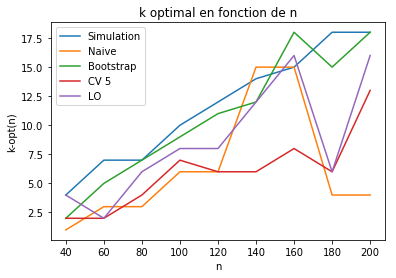

## Question 7.
Reprendre la question précédente, estimer la valeur de $k$ qui minimize le risque:
$$R_n = \mathbb{E}_{(X_1,Y_1),\dots,(X_n,Y_n)}\Big[ \mathbb{E}_{(X,Y)}\left(\left(Y-f_n(X)\right)^2 \right) \Big]$$
mais cette fois ci, représenter en fonction de $n$ l'erreur de prédiction attendue (Expected Prediction Error, EPE): 
$$\mathbb{E}_{(X,Y)}\left(\left(Y-f_n(X)\right)^2 \right),$$
pour l'estimateur $k$-NN dont le nombre de voisin $k$ a été réglé par la méthode considérée. Pour la première méthode, prendre la valeur minimale trouvée par simulation.


Commenter et conjecturer le comportement lorsque $n \to \infty$. 



Text(0,0.5,'EPE(n)')

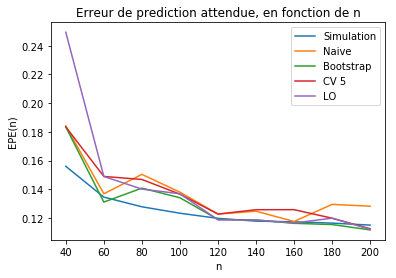